# Quais os imóveis que House Rocket deveriam comprar?
- coletador os dados no kangle
- agrupar por região (zipcode)
- Dentro de cada região, vou fazer a mediana dos preços dos imóveis
- E entao sugerir a compra dos imóveis que estão abaixo do valor dessa mediana e com boas condições de compra.

- Exemlo de Tabela:
    Imóvel Cód Região\ Preço do Imóvel \ Preço da Mediana \ Condição\ Status:
    328545            \ 450 mil         \ 500 mil         \ boa     \Compra
    48578              \625 mil          \ 500 mil        \boa     \ Não Compra
    58789              \358 mil           \ 485 mil       \Não      \Não Compra 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import gridspec
from IPython.core.display import HTML 

In [3]:
def diferenca(vf,vi):
    porcentagem = np.round((( vf-vi) / vi) *100,(2))
    
    return porcentagem

In [6]:
df = pd.read_csv('./kc_house_data.csv')

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# TRANSFORMATION

In [8]:
# conventando em datetime as datas
df['date'] = pd.to_datetime(df['date'])

#df['yr_built'].pd.to_datetime(df['yr_built']).dt.strftime('%Y-%m-%d')
df['yr_built']= pd.to_datetime(df['yr_built'],format= '%Y')

#criando coluna do mês
df['month'] = df['date'].dt.month

#criando coluna dos anos
df['year'] = df['date'].dt.year

#criando coluna para transformar pé quadrado em área quadrado
df['m2_lot'] = df['sqft_lot'].apply(lambda x: np.round(x * 0.092903,2) )

#criando coluna de preços por M2
df['price_m2_lot'] = np.round(df['price'] / df['m2_lot'],2)

# transformando pé quadrados das salas em M2
df['m2_living'] = np.round(df['sqft_living']* 0.092903,2) 

df['m2_basement'] = np.round(df['sqft_basement'] * 0.092903,2)


# H1: Imóveis que possuem vista para água, são 30% mais caros, na média.
# H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
# H3: Imóveis sem porão possuem sqrt_lot, são 50%
# maiores do que com porão.
# H4: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%
# H5: Imóveis com 3 banheiros tem um crescimento MoM
# H6: Casas reformadas depois do ano 2000 são 25% mais caras
# H7: Casas localizadas com zipcode 98003, são 15% mais baratas
# H8: Casas que tem uma nota maior, são as que contém mais quartos
# H9: Casas que tem uma sala maior, são 20% mais caras
# H10: Casas vendem mais do verão

# H1: Imóveis que possuem vista para água, são 30% mais caros, na média.¶

### Falsa: Imóveis com vista para água em média 45,93% mais caros em relação aos que não contém vista para o mar.

A diferença é de 45.93 %


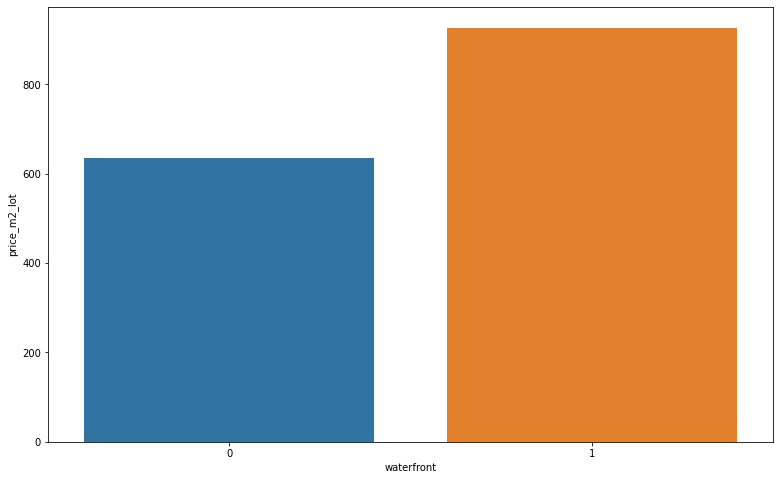

In [18]:
#df.loc[df['waterfront']==1].count()
#df.loc[df['waterfront']==0].count()
f_h1 = df[['waterfront','price_m2_lot']].groupby('waterfront').median().reset_index()

#filtrando as casas c/ vista p/ o mar
a = f_h1.loc[f_h1['waterfront']== 0]

#filtrando as casas s/ vista para o mar
b = f_h1.loc[f_h1['waterfront']!= 0]

#calculando a diferença em % / pegando o primeiro valor de cada característica do imóvel

porcentagem = diferenca(vf=b['price_m2_lot'].iloc[0], vi=a['price_m2_lot'].iloc[0])

print('A diferença é de {} %'.format(porcentagem))

#plotando o gráfico

#dimensão do gráfico
fig = plt.figure(figsize=(13,8))

sns.barplot(x= 'waterfront', y='price_m2_lot', data = f_h1);



In [15]:
#H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média
# selecionar coluna mediana de construção (yr_built)
# saber o preço médiano dos imóveis desse perfil (fazer um filtro)
# fazer estrutura de repetição que compare essa condição do imóvel


# H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média

Casas construidas antes de 1955 não são mais baratas. Elas são em média 133.3 mais caras em comparação 
 construídas após esse período


133.3

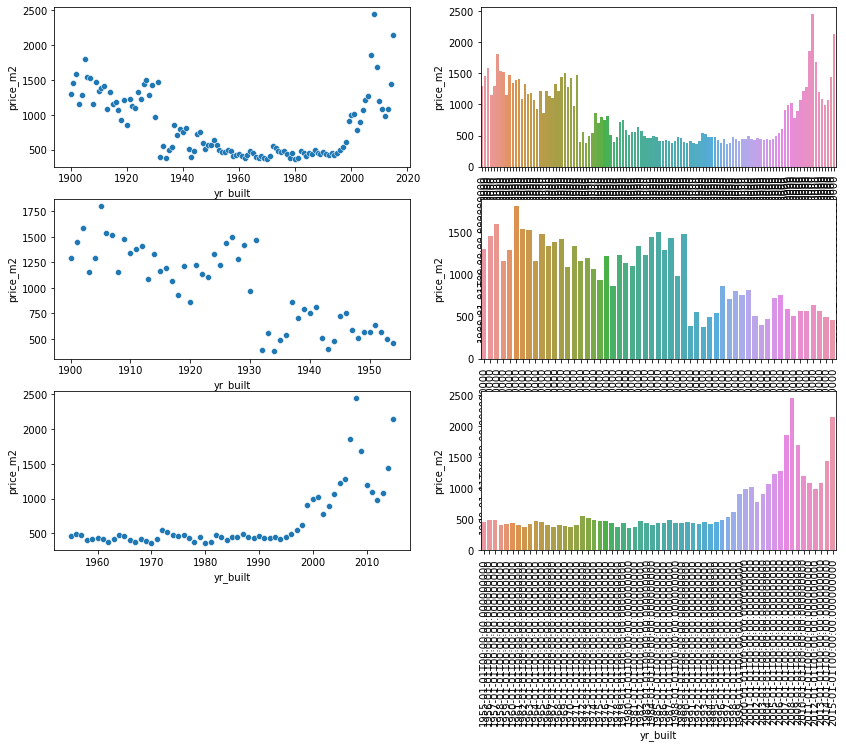

In [8]:
#agrupando e criando os filtros das casas construidas.
f_h2 = df[['yr_built','price_m2_lot']].groupby('yr_built').median().reset_index()

# filtrando os imóveis antes do ano de 1955
menor = f_h2.loc[f_h2['yr_built'] < '1955']

#filtrando os imóveis construindo desde de 1955
maior = f_h2.loc[f_h2['yr_built'] >= '1955']

#descobriando a mediana de preços dos imóveis mais antigo
antigo = menor.median(numeric_only=True).iloc[0]

#descobrindo a mediana de preços dos imóveis mais novos
novo   = maior.median(numeric_only=True).iloc[0]

#calculando a diferenca % entre os tipos de imóveis
porcentagem_2 = diferenca(vf= antigo, vi= novo)

print('Casas construidas antes de 1955 não são mais baratas. Elas são em média {} mais caras em comparação \n construídas após esse período'.format(porcentagem_2))
display(porcentagem_2)
#plotando os gŕaficos:

fig = plt.figure(figsize=(14,10))

#geral
plt.subplot(3,2,1)
sns.scatterplot(x='yr_built', y='price_m2_lot', data=f_h2);

plt.subplot(3,2,2)
sns.barplot(x= 'yr_built', y='price_m2_lot', data= f_h2);
plt.xticks(rotation=90);

#menor
plt.subplot(3,2,3)
sns.scatterplot(x='yr_built', y='price_m2_lot', data=menor);

plt.subplot(3,2,4)
sns.barplot(x= 'yr_built', y='price_m2_lot', data= menor);
plt.xticks(rotation=90);

#maior
plt.subplot(3,2,5)
sns.scatterplot(x='yr_built', y='price_m2_lot', data=maior);

plt.subplot(3,2,6)
sns.barplot(x= 'yr_built', y='price_m2_lot', data= maior);
plt.xticks(rotation=90);


H3: Imóveis sem porão possuem sqrt_lot, são 50%¶
maiores do que com porão.

 -- selecionar a coluna casas c/metragem mediana c/porão (BASEMENT)
 -- selecionar a coluna sqrt_lot
 -- fazer uma comparação entre casas c/ e s/ porão

# H3: Imóveis sem porão possuem sqrt_lot, são 50%¶ maiores do que com porão.

A diferença é de 3.62 %.


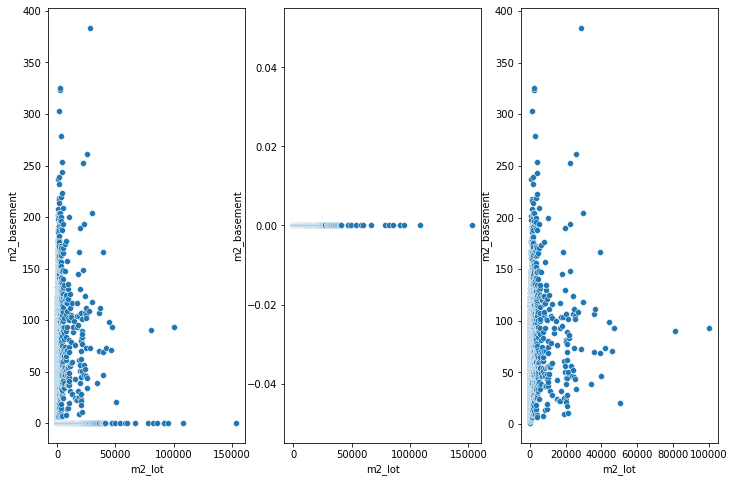

In [50]:
f_h3 = df[['m2_lot','m2_basement']].groupby('m2_lot').median().reset_index()

#filtrando as casas sem porão
without_basement = f_h3.loc[f_h3['m2_basement']== 0]

#filtrando as casas com porão
with_basement = f_h3.loc[f_h3['m2_basement']!= 0]

#============================================================#
#calculando a diferença %

#porcentagem = diferenca(vf=aux2,vi=aux1)
aux1 = f_h3.loc[f_h3['m2_basement']== 0,['m2_lot']].median().iloc[0]

#filtrando as casas c/ porão
aux2 = f_h3.loc[f_h3['m2_basement']!= 0,['m2_lot']].median().iloc[0]

print('A diferença é de {} %.'.format(diferenca(vf=aux2,vi=aux1)))

#============================================================#

#plotando gráficos

fig = plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
sns.scatterplot(x='m2_lot', y='m2_basement', data= f_h3);

plt.subplot(1,3,2)
sns.scatterplot(x='m2_lot', y='m2_basement', data= without_basement);

plt.subplot(1,3,3)
sns.scatterplot(x='m2_lot', y='m2_basement', data= with_basement);

## H4: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%

O Crescimenmto anual dos imóveis são de -51.19047818530462


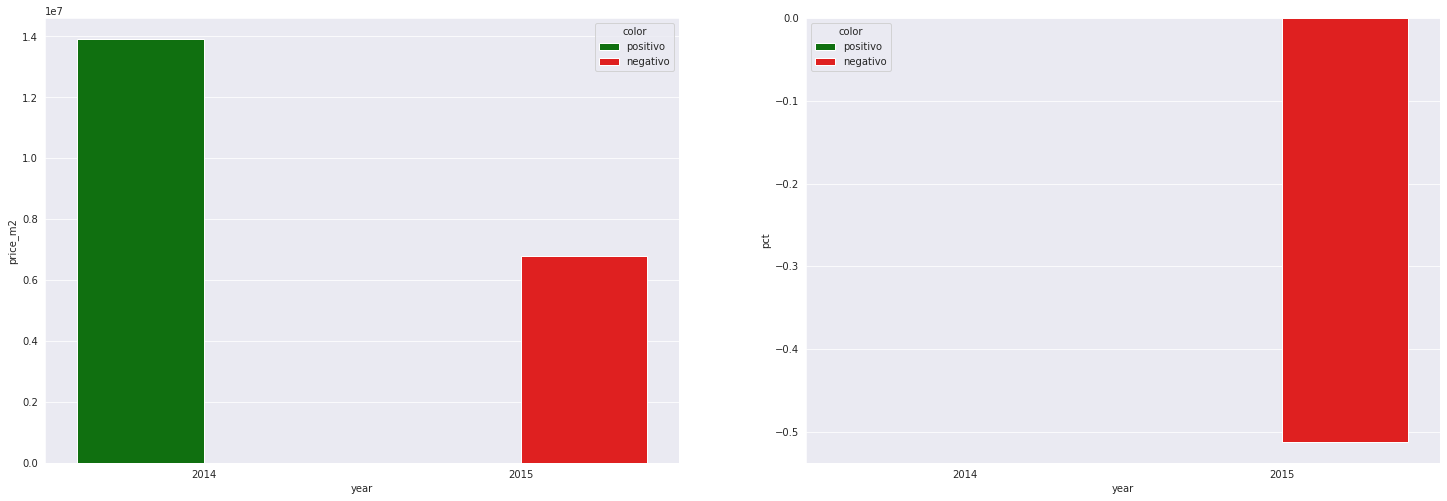

In [40]:

# separando, agrupando e somando os valores dos respectivos anos do DF
by_year = df[['price_m2','year']].groupby('year').sum().reset_index()


# fazendo o calculo % utilizndo função do pandas pct._charge() para calcular a diferença do ano para outro
by_year['pct'] = by_year['price_m2'].pct_change()

#criando coluna para indentificar quais são os anos negativos e positivo
by_year['color'] = by_year['pct'].apply(lambda x: 'negativo' if x<0 else 'positivo')

crescimento = by_year['pct'].loc[1] * 100

print('O Crescimenmto anual dos imóveis são de {}'.format( crescimento ) )

# ===== montagem do gráfico ======= #
# tamanho do gŕafico
fig = plt.figure(figsize=(25,18))
# estilo do gráfico
sns.set_style('darkgrid') 

# selecionado as cores do gráfico
color = ['green','red'] 

#plotando o gráfico 
plt.subplot(2,2,1)
sns.barplot(x = 'year', y = 'price_m2',hue = 'color', palette = color, data= by_year);

plt.subplot(2,2,2)
sns.barplot(x= 'year', y = 'pct', data= by_year, hue ='color',palette = color);
#sns.barplot(x= 'year', y = 'pct', data= by_year, hue ='color',palette = color);

plt.show()

## H5: Imóveis com 3 banheiros tem um crescimento MoM

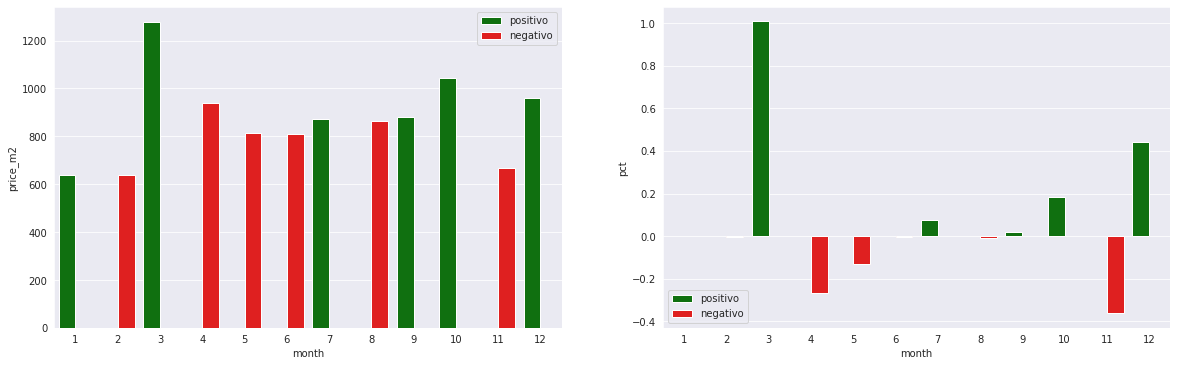

In [51]:
df_aux = df.loc[df['bathrooms']==3]

#separando e agrupando os imóveis por preço, mês e com as quantidades de banheiros
df_aux1 =df_aux[['price_m2','month','bathrooms']].groupby('month').median().reset_index()


# fazendo o calculo % utilizndo função do pandas pct._charge() para calcular a diferença do ano para outro
df_aux1['pct'] = df_aux1['price_m2'].pct_change()

#df_aux1['pct'].loc

df_aux1['color'] = df_aux1['pct'].apply(lambda x: 'negativo' if x<0 else 'positivo')

# ===== montagem do gráfico ======= #
# tamanho do gŕafico
fig = plt.figure(figsize=(20,13))

sns.set_style('darkgrid') 

# selecionado as cores do gráfico
color2 = ['green','red'] 


plt.subplot(2,2,1)
sns.barplot( x = 'month', y = 'price_m2', hue='color',palette=color2, data= df_aux1);
plt.legend(loc='best');

plt.subplot(2,2,2)
sns.barplot( x= 'month', y = 'pct',hue ='color',palette = color2, data= df_aux1);
plt.legend(loc='best');

### Hipotese 5 é falso. Pois como desmonstrado no gráfico 2 é possível notar que não há um crescimento mês a mês de 10% imóveis com 3 banheiros.

# H6: Casas reformadas antes do ano 2000 são 21% mais baratas

Imóveis reformados antes dos anos 2000 são -37.47 % mais baratos


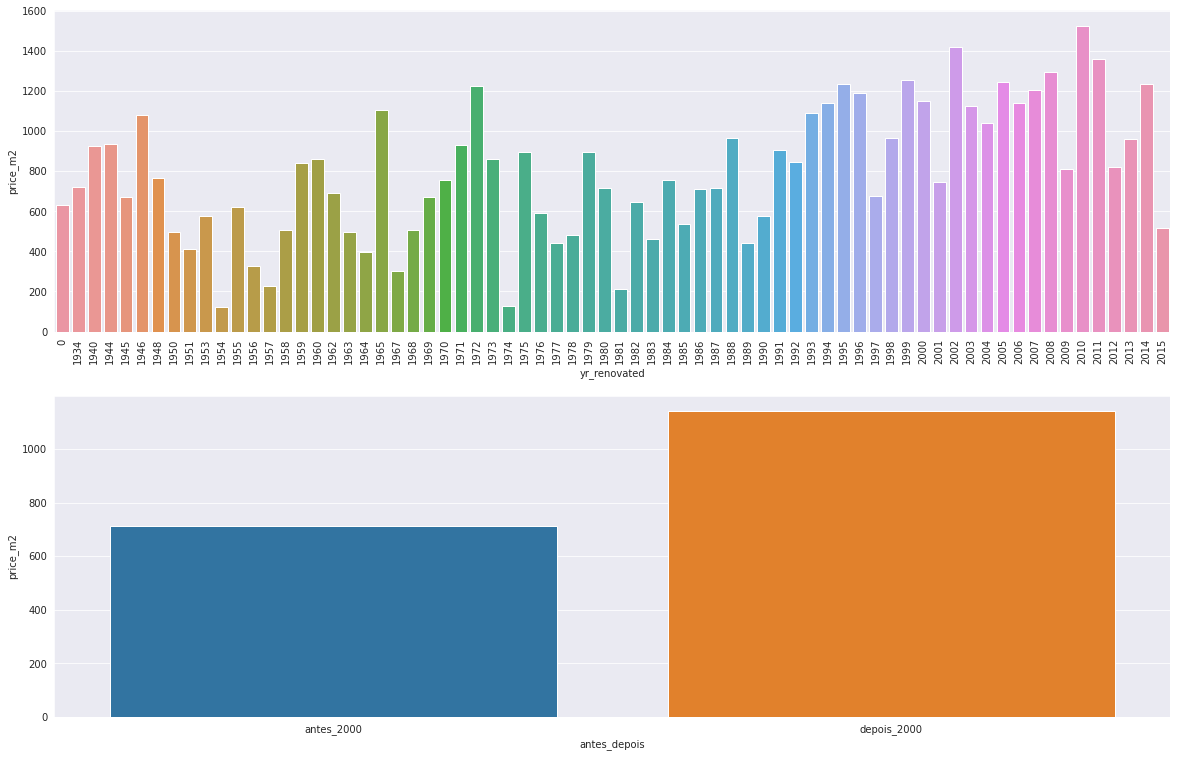

In [106]:
# filtrando a agrupando os imóveis por imóveis renovado e seus respectivos preços
df_filtro = df[['yr_renovated','price_m2']].groupby('yr_renovated').median().reset_index()

# criando uma nova coluna de antes e depois do ano 2000
df_filtro['antes_depois'] = df_filtro['yr_renovated'].apply(lambda x: 'antes_2000' if x<= 2000 else 'depois_2000')

# agrupando os dados por período e preço po M2
aux_reforma= df_filtro[['antes_depois','price_m2']].groupby('antes_depois').median().reset_index()

# coletando o valor do preço antes do ano 2000
price_before = aux_reforma['price_m2'].loc[0]

# coletando o valor do preço depois do ano 2000
price_after = aux_reforma['price_m2'].loc[1]

# calculando a diferença %
porcentagem = diferenca(vf=price_before,vi=price_after)


print('Imóveis reformados antes dos anos 2000 são {} % mais baratos'.format(porcentagem))
#====================================================================#

# plotando os gráficos
fig = plt.figure(figsize=(20,13))

plt.subplot(2,1,1)

sns.barplot(x = 'yr_renovated', y= 'price_m2', data = df_filtro);
plt.xticks(rotation =90);

plt.subplot(2,1,2)
sns.barplot( x = 'antes_depois', y= 'price_m2', data = aux_reforma);


## H7: Casas localizadas com zipcode 98003, são os imóveis mais baratos


Hipotese é falsa. Casas com zipcode não são as mais baratas

,zipcode,price_m2
14,98024,104.371519


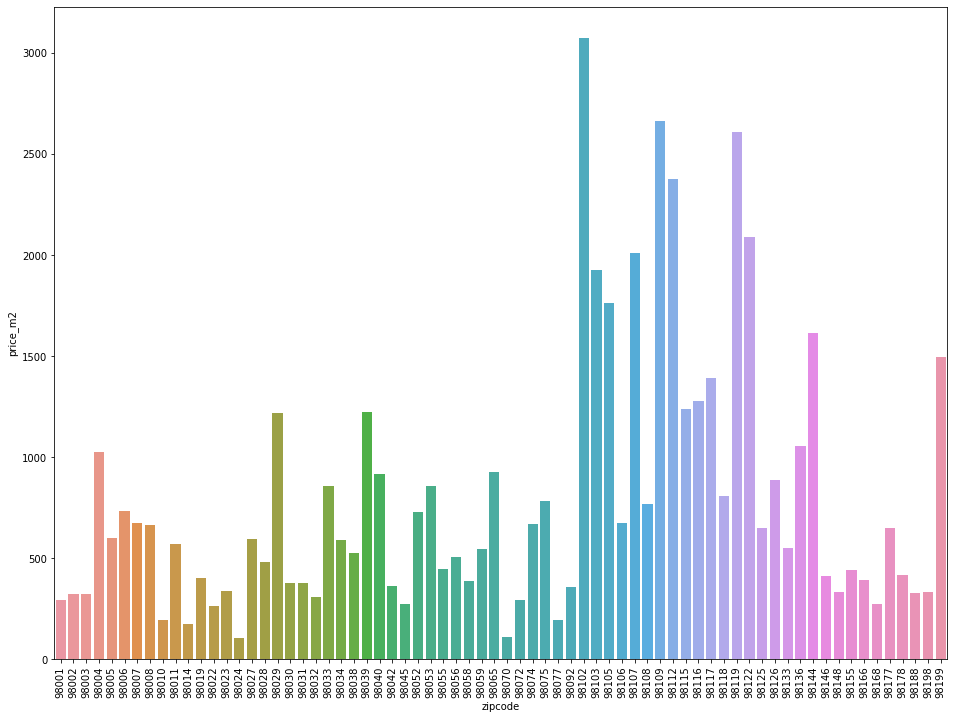

In [11]:
#selecionar coluna zipcode e price
# fazer o agrupamento das colunas e fazer médiana
# fazer o filtro do endereço (zipcode) e (criar uma/criar um novo df c/isso)
# ordenar os preços


#ordernando,separando e agrupaando os preços dos imóveis.
df_h7 =df[['zipcode','price_m2']].groupby('zipcode').median().reset_index()

# criando váraivel para descobrindo o imóvel com menor preço
less_price = df_h7['price_m2'].min()

#fazendo o filtro para descobrir qual é zipcode corresponde ao menor preço filtrado
less_zipcode = df_h7[df_h7['price_m2']==less_price]

display(less_zipcode)


#====================================================================#

fig = plt.figure(figsize=(16,12))

# plotando os gráficos
sns.barplot( x = 'zipcode', y= 'price_m2', data = df_h7);
plt.xticks(rotation=90);



## H8: Casas que tem uma nota maior, são as que contém mais quartos



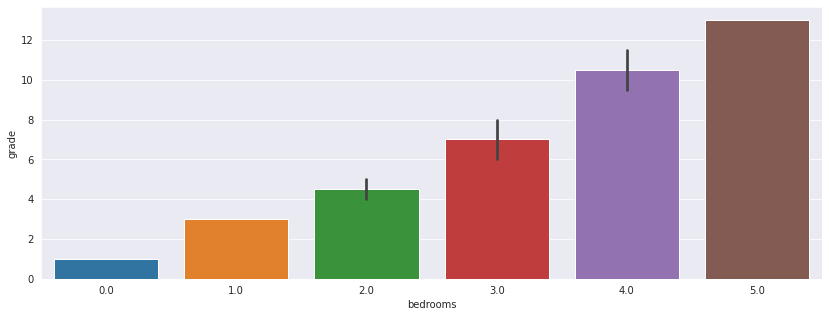

In [75]:
#selecionar a coluna de notas e quartos
# fazer o agrupamento c/groupby


df_h8 = df[['grade','bedrooms']].groupby('grade').median().reset_index()

#plotando o gráfico comparativo
fig = plt.figure(figsize=(14,5))


sns.barplot(x = 'bedrooms', y = 'grade', data = df_h8);



## H9: Casas que tem uma sala maior são mais caras

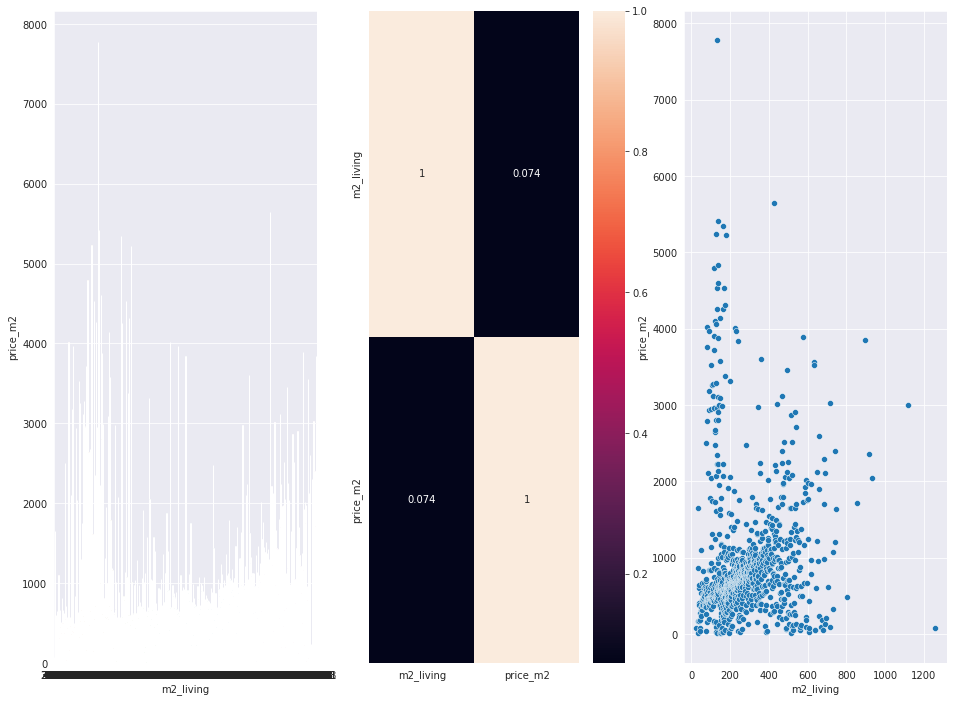

In [77]:
df_h9 = df[['price_m2','m2_living']].groupby('m2_living').median().reset_index()

#montando os gráficos
fig = plt.figure(figsize=(16,12))

plt.subplot(1,3,1)
sns.barplot(x = 'm2_living', y = 'price_m2', data = df_h9);

plt.subplot(1,3,2)
sns.heatmap(df_h9.corr (method= 'pearson'), annot = True);

plt.subplot(1,3,3)
sns.scatterplot(x = 'm2_living', y = 'price_m2', data = df_h9);

# H10: As casas são mais caras no verão

#### É falso. Casas são mais caras na primavera do que no verão

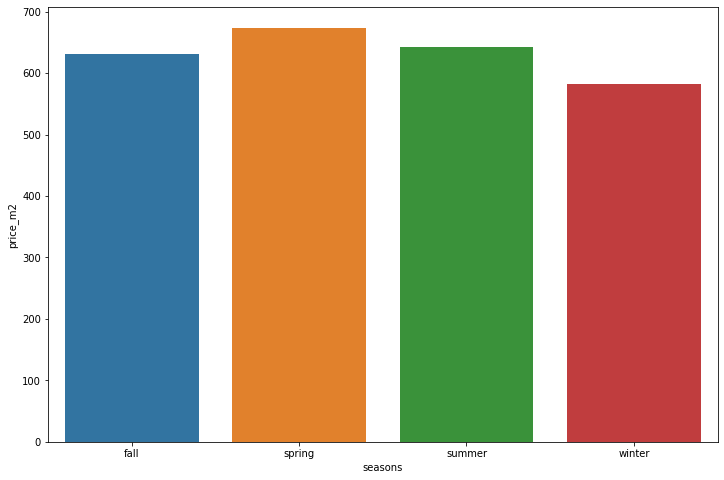

In [25]:

# criando coluna adicional de estações do ano conforme as datas na coluna month
df['seasons'] = df['month'].apply(lambda x: 'spring'  if (x>=3) & (x<=5) else 'summer' if (x>=6) & (x<=8) else 
                                  'fall' if (x>=9) & (x<=11) else 'winter')

#separando e agrupando os imóveis por preço e estação do ano
houses_seasons = df[['seasons','price_m2']].groupby('seasons').median().reset_index()

#montando o gráfico 

#ajustando o tamanho
fig = plt.figure(figsize=(12,8))

#plotando o gráfico para ilustrar a comparação
sns.barplot(x='seasons', y= 'price_m2', data=houses_seasons);

# TABELA DE RECOMENDAÇÃO DE COMPRA

In [10]:
df1 = df.copy()

In [11]:

#criando coluna das estações
df1['seasons'] = df['month'].apply(lambda x: 'spring'  if (x>=3 and x<=5) else 'summer' if (x>=6 and x<=8) else 
                                  'fall' if (x>=9 and x<=11) else 'winter')

#criando coluna de referencia numerica das estações
df1['numeric_seasons'] = df1['seasons'].apply(lambda x: 1 if x == 'summer' else 2 if x== 'spring' 
                                              else 3 if x== 'fall' else 4)

In [12]:
#fazendo a mediana de preços dos endereços(zipcode) por preço por M2 construídos
price_region = df1[['zipcode','price_m2_lot']].groupby('zipcode').median().reset_index()

#renomenado as colunas para futura mescla
price_region.columns= ['zipcode','price_region']

#fazenddo as medianas de zipcode e numeric_seasons 
seasons_median = df1[['numeric_seasons','zipcode','price_m2_lot']].groupby(['zipcode','numeric_seasons']).median().reset_index()

seasons_median.columns = ['zipcode','numeric_seasons','price_seasons']

In [13]:
#unificando os preços medianos das regioões com o DF original
df1 = pd.merge(df1,price_region, on='zipcode',how='inner')

#unificando a mediana de preços por estações do ano
df1 = pd.merge(df1,seasons_median, on= ['zipcode','numeric_seasons'], how='inner')


# TABLE ACQUISITION OF HOUSES

In [14]:
#loading date
location = df1.head(50).copy(deep=True)

#select columns necessary
location = location[['id','zipcode','price','price_region','price_seasons','condition',
                     'waterfront','lat','long']].copy(deep=True)

#library of maps
from geopy.geocoders import Nominatim

#initialize Nominatim APi

geolocator = Nominatim(user_agent ='geoapiExercises') #porteiro

#guardando a latitude e longitude para acessar o endereço no mapa
#response=geolocator.reverse ('47.4977,-122.226')

for i in range(len(location)):
    
    #descobrindo a localização dos imóveis
    query = str(location.loc[i,'lat']) + ',' + str(location.loc[i,'long'])
    
    response = geolocator.reverse(query,timeout=1000)
    
    if 'city' in response.raw['address']:
        location.loc[i,'city'] = response.raw['address']['city']
    
        if 'state' in response.raw['address']:
            location.loc[i,'state']= response.raw['address']['state']
    
            if 'neighbourhood'in response.raw['address']:
                location.loc[i,'neighbourhood']= response.raw['address']['neighbourhood']
    
        #linha de condição de compra de acordo com os perfis dos imóveis 
    location['acquisition'] = location.apply(lambda x: 'buy' if (x['price_seasons']< x['price_region']) 
                                                 & (x['waterfront']==1) & (x['condition']>=3) else 'no_buy', axis=1)
       
    tabela = location[['id','zipcode','price','price_region','condition','waterfront','state',
                       'city','neighbourhood','acquisition']].copy(deep=True)

In [15]:
tabela.head()

,id,zipcode,price,price_region,condition,waterfront,state,city,neighbourhood,acquisition
0,7129300520,98178,221900.0,413.625,3,0,Washington,Seattle,Rainier Beach,no_buy
1,2976800796,98178,236000.0,413.625,3,0,Washington,Seattle,NaN,no_buy
2,1180003090,98178,190000.0,413.625,3,0,NaN,NaN,NaN,no_buy
3,2171400197,98178,350000.0,413.625,3,0,Washington,Seattle,NaN,no_buy
4,1180002378,98178,299000.0,413.625,3,0,Washington,Seattle,Bryn Mawr,no_buy


# TABLE OF SELL HOUSES

1. Se o preço da compra for maior que amediana da região + sazonalidade.
O preço da venda será igual ao preço da
compra + 10%.

1.Se o preço da compra for menor que a
mediana da região + sazonalidade.O
preço da venda será igual ao preço da
compra + 30%

In [16]:
#linha que calculo o preço de venda dos imóveis:
tabela['sell']= tabela.apply(lambda x: (x['price']* 0.30 + x['price']) if x['acquisition']=='buy' 
                                 else (x['price'] *0.10 + x['price']),axis=1)

#linha que calculo a lucratividade dos imóveis
tabela['lucro'] = tabela.apply(lambda x: x['sell'] - x['price'],axis=1)

#criando coluna com as respectivas porcentagens de lucro das vendas dos imóveis
tabela['porcentagem_lucro'] = diferenca(vf=tabela['sell'],vi=tabela['price'])

# MAP OF HOUSES

In [14]:
#https://towardsdatascience.com/visualization-with-plotly-express-comprehensive-guide-eb5ee4b50b57

In [22]:
#loading librarie map
import plotly.express as px

#building the MAP

# select columns necessary for map
houses = df1[['id','price','lat','long']].copy()

fig = px.scatter_mapbox(houses,
                       lat='lat',
                       lon='long',
                       size='price',
                       color_continuous_scale= px.colors.cyclical.IceFire,
                       hover_name= 'id',
                       hover_data= ['price'],
                       size_max=18,
                       zoom=12)

#adicionando o modelo do mapa
fig.update_layout(mapbox_style='open-street-map')

#adicionando as margens no mapa dos imóveis
fig.update_layout(height=600, margin={'r':0, 't':0, 'l':0, 'b': 0} )


fig.show()


- introdução a dashboard
https://datamarte.com/streamlit-construindo-relatorios-e-dashboard-para-data-science-em-python/#Visualizacao_Graficanbsp

- documentação do plotly
https://plotly.com/python/bar-charts/